# Settings

In [5]:
%load_ext autoreload
%autoreload 2

In [12]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import remixt

In [2]:
import remixt.cn_plot as cn_plot

# Data

In [3]:
class Wildcards:
    def __init__(self, sample):
        self.sample = sample

In [4]:
def _get_remixtpp_cn_path(wildcards):
    tb_path = '/juno/work/shah/users/chois7/tickets/remixt-pp-plot/resources/paths.WGS-REMIXT-POSTPROCESS.tsv'
    tb = pd.read_table(tb_path)
    tb = tb[tb['result_type']=='remixt_cn']
    tb = tb[tb['isabl_sample_id'] == wildcards.sample]
    assert tb.shape[0] == 1, f'tb=\n{tb}'
    path = tb['result_filepath'].iloc[0]
    return path

In [5]:
samples = ['HCM-CSHL-0058-C34-86A']
sample = samples[0]
wildcards = Wildcards(sample)

In [89]:
allele_cn_filename

'/juno/work/shah/isabl_data_lake/analyses/58/69/35869/SHAH_H003230_T03_01_WG01_cn.csv'

In [6]:
allele_cn_filename = _get_remixtpp_cn_path(wildcards)
data = pd.read_csv(allele_cn_filename, sep='\t', dtype={'chromosome': 'str'})

In [7]:
data

,chromosome,start,end,major_is_allele_a,length,major_readcount,minor_readcount,readcount,allele_ratio,major_depth,...,minor_e,total_e,major_raw_e,minor_raw_e,major_diff,minor_diff,prob_is_outlier_total,prob_is_outlier_allele,total_likelihood_mask,allele_likelihood_mask
0,chr1,10000,207666,1,11066.236447,365,150,3949,0.291262,0.252914,...,309.201808,815.848709,2.586698,0.0,1,0,0.01,0.01,0,0
1,chr1,257666,297968,1,1527.074357,228,37,1697,0.139623,0.956116,...,42.667998,112.582236,2.586698,0.0,1,0,0.01,0.01,0,0
2,chr1,347968,500000,1,86.961033,12,0,295,0.000000,3.392324,...,2.429779,6.411127,2.586698,0.0,1,0,0.01,0.01,0,0
3,chr1,500000,535988,1,138.623660,33,31,469,0.484375,1.744494,...,3.873285,10.219909,2.586698,0.0,1,0,0.01,0.01,0,0
4,chr1,585988,1000000,1,200841.515783,4435,2826,27332,0.389203,0.083122,...,5611.714533,14806.867017,2.586698,0.0,1,0,0.01,0.01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6425,chrY,26000000,26500000,1,178951.795980,0,0,8310,0.000000,0.046437,...,5000.093682,10000.187364,0.000000,0.0,0,0,1.00,0.01,1,0
6426,chrY,26500000,26673214,1,161237.136841,0,0,15339,0.000000,0.095133,...,4505.128238,9010.256475,0.000000,0.0,0,0,0.01,0.01,0,0
6427,chrY,56673214,56771509,1,459.179532,0,0,75595,0.000000,164.630596,...,12.829939,25.659879,0.000000,0.0,0,0,0.01,0.01,0,0
6428,chrY,56821509,57000000,1,62244.809051,0,0,26645,0.000000,0.428068,...,1739.182749,3478.365498,0.000000,0.0,0,0,0.01,0.01,0,0


In [16]:
data['chromosome'] = data['chromosome'].str.replace('chr', '')

# Plot

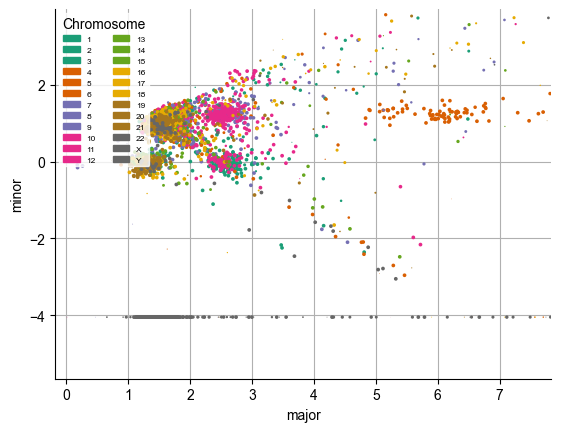

In [75]:
remixt.cn_plot.plot_cnv_scatter(plt.gca(), data, major_col='major_raw', minor_col='minor_raw')

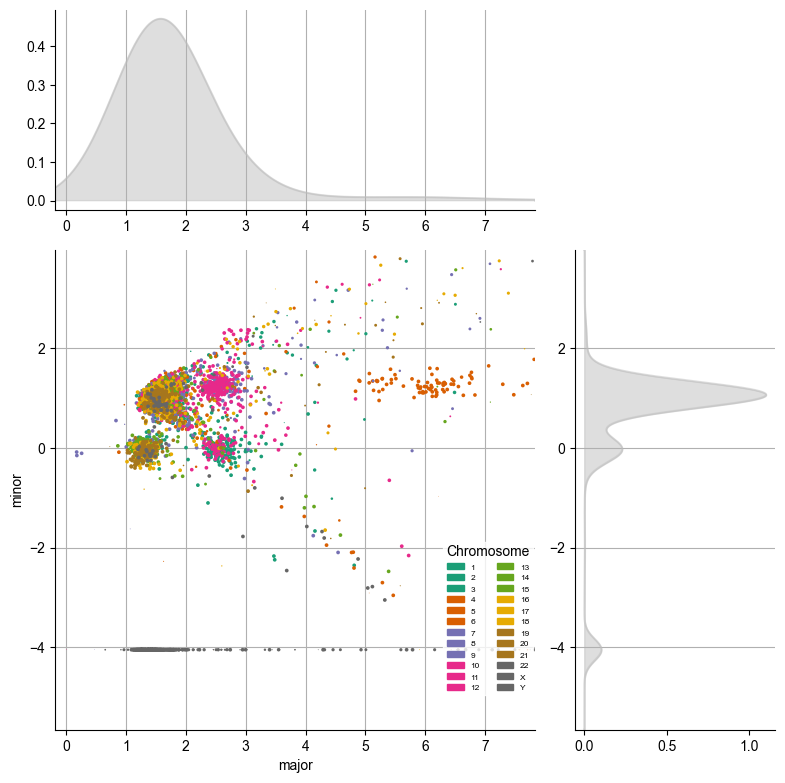

In [38]:

fig = plt.figure(figsize=(8,8))

box = matplotlib.transforms.Bbox([[0., 0.], [1., 1.]])
transform = matplotlib.transforms.BboxTransformTo(box)
_ = remixt.cn_plot.plot_cnv_scatter_density(fig, transform, data, major_col='major_raw', minor_col='minor_raw')

ax1, _, ax3, ax4 = fig.get_axes()
legend = ax1.get_legend()
legend.set_bbox_to_anchor((0.8, 0.4))

In [19]:
chromosomes = [str(a) for a in list(range(1, 23)) + ['X', 'Y']]

In [90]:
sample

'HCM-CSHL-0058-C34-86A'

In [69]:
def add_legend(fig, label_colors, marker='_'):
    ax = fig.get_axes()[0]
    handle = [plt.plot([], [],
              color=label_colors[label], marker=marker, ms=4, ls="")[0] 
              for label in label_colors]
    legend = ax.legend(handles=handle, labels=label_colors.keys(), title="labels")
    legend.get_frame().set_alpha(0.4)
    ax.add_artist(legend);

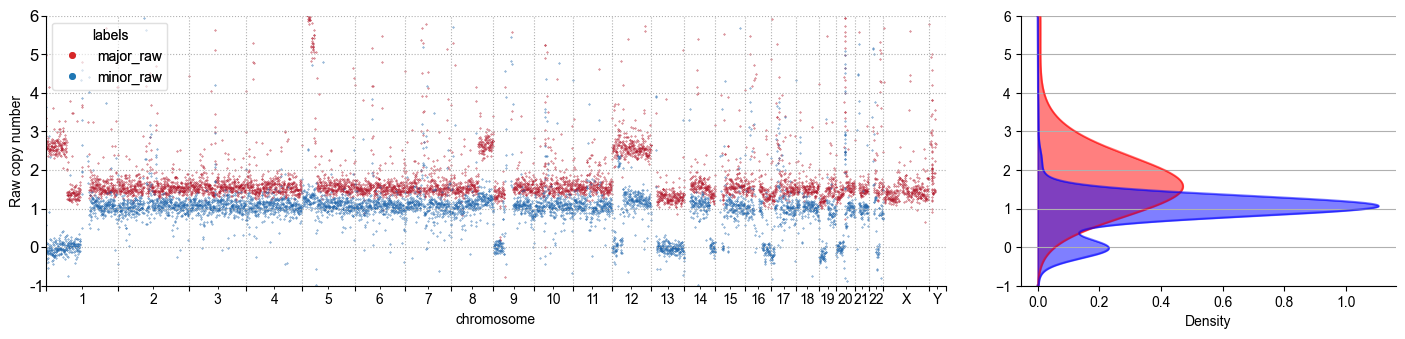

In [74]:

fig = plt.figure(figsize=(15, 3))

box = matplotlib.transforms.Bbox([[0., 0.], [1., 1.]])
transform = matplotlib.transforms.BboxTransformTo(box)

chromosomes = [str(a) for a in list(range(1, 23)) + ['X', 'Y']]

_ = remixt.cn_plot.plot_cnv_genome_density(fig, transform, data, chromosomes=chromosomes, scatter=True)

label_colors = {'major_raw': 'tab:red', 'minor_raw':'tab:blue'}
add_legend(fig, label_colors, marker='o')

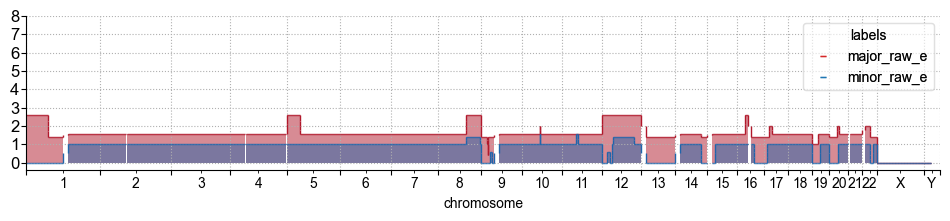

In [68]:

fig = plt.figure(figsize=(11.8, 2))

_ = remixt.cn_plot.plot_cnv_genome(
    plt.gca(), data, major_col='major_raw_e', minor_col='minor_raw_e',
    chromosomes=chromosomes, scatter=False, do_fill=True, maxcopies=8)

label_colors = {'major_raw_e': 'tab:red', 'minor_raw_e':'tab:blue'}
add_legend(fig, label_colors)

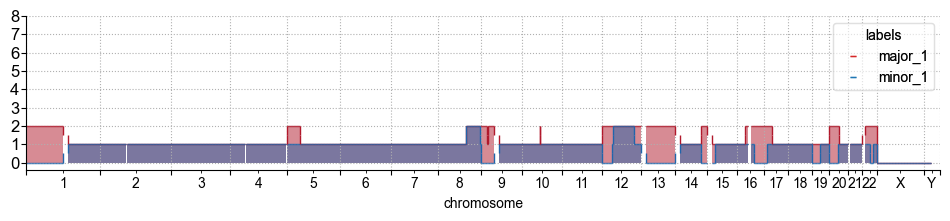

In [64]:

fig = plt.figure(figsize=(11.8, 2))

_ = remixt.cn_plot.plot_cnv_genome(
    plt.gca(), data, major_col='major_1', minor_col='minor_1',
    chromosomes=chromosomes, scatter=False, do_fill=True, maxcopies=8)

label_colors = {'major_1': 'tab:red', 'minor_1':'tab:blue'}
add_legend(fig, label_colors)

# PdfPages

In [84]:
from matplotlib.backends.backend_pdf import PdfPages


In [82]:
def add_legend(fig, label_colors, marker='_'):
    ax = fig.get_axes()[0]
    handle = [plt.plot([], [],
              color=label_colors[label], marker=marker, ms=4, ls="")[0] 
              for label in label_colors]
    legend = ax.legend(handles=handle, labels=label_colors.keys(), title="labels")
    legend.get_frame().set_alpha(0.4)
    ax.add_artist(legend);

chromosomes = [str(a) for a in list(range(1, 23)) + ['X', 'Y']]

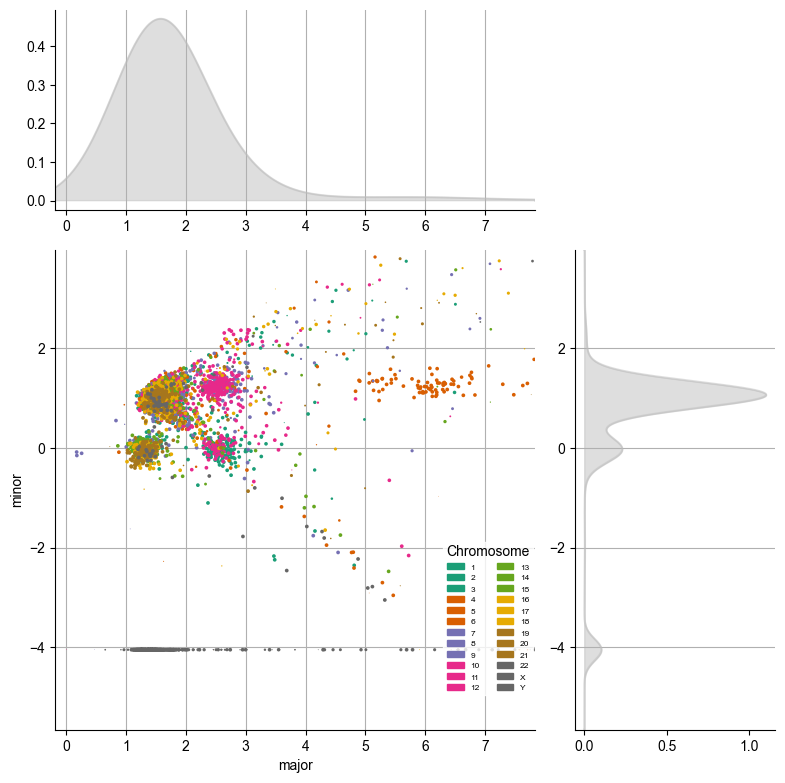

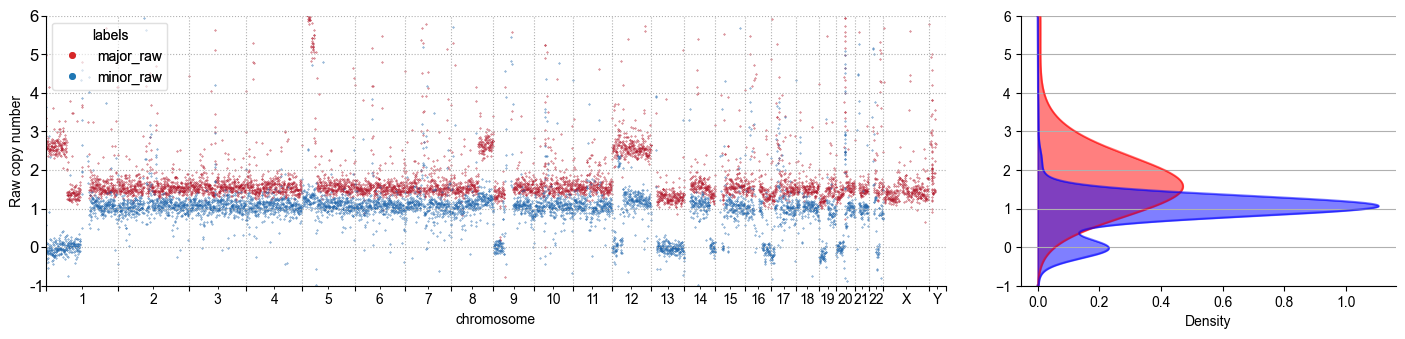

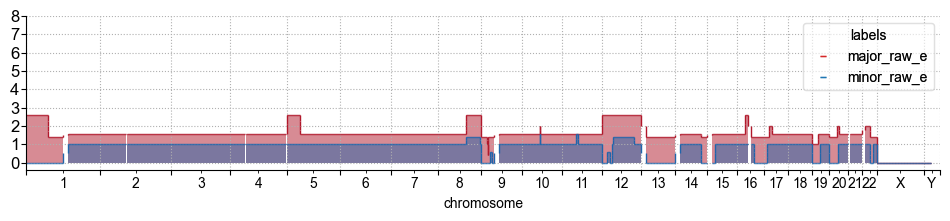

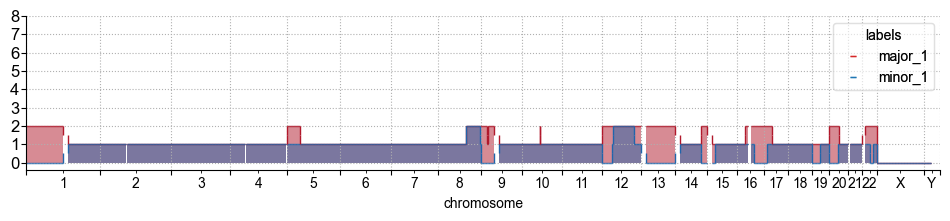

In [87]:
p = PdfPages('test.pdf')

# fig 1
fig = plt.figure(figsize=(8,8))

box = matplotlib.transforms.Bbox([[0., 0.], [1., 1.]])
transform = matplotlib.transforms.BboxTransformTo(box)
_ = remixt.cn_plot.plot_cnv_scatter_density(fig, transform, data, major_col='major_raw', minor_col='minor_raw')

ax1, _, ax3, ax4 = fig.get_axes()
legend = ax1.get_legend()
legend.set_bbox_to_anchor((0.8, 0.4))

p.savefig(fig)


# fig 2
fig = plt.figure(figsize=(15, 3))

box = matplotlib.transforms.Bbox([[0., 0.], [1., 1.]])
transform = matplotlib.transforms.BboxTransformTo(box)

chromosomes = [str(a) for a in list(range(1, 23)) + ['X', 'Y']]

_ = remixt.cn_plot.plot_cnv_genome_density(fig, transform, data, chromosomes=chromosomes, scatter=True)

label_colors = {'major_raw': 'tab:red', 'minor_raw':'tab:blue'}
add_legend(fig, label_colors, marker='o')

p.savefig(fig)


# fig 3

fig, ax = plt.subplots(figsize=(11.8, 2))

_ = remixt.cn_plot.plot_cnv_genome(
    plt.gca(), data, major_col='major_raw_e', minor_col='minor_raw_e',
    chromosomes=chromosomes, scatter=False, do_fill=True, maxcopies=8)

label_colors = {'major_raw_e': 'tab:red', 'minor_raw_e':'tab:blue'}
add_legend(fig, label_colors)

p.savefig(fig)


# fig 4
fig, ax = plt.subplots(figsize=(11.8, 2))

_ = remixt.cn_plot.plot_cnv_genome(
    plt.gca(), data, major_col='major_1', minor_col='minor_1',
    chromosomes=chromosomes, scatter=False, do_fill=True, maxcopies=8)

label_colors = {'major_1': 'tab:red', 'minor_1':'tab:blue'}
add_legend(fig, label_colors)

p.savefig(fig)

# close
p.close()